In [146]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import pint
import pint_pandas

In [147]:
# %matplotlib widget

In [148]:
units = pint_pandas.PintType.ureg
units.setup_matplotlib()

In [149]:
run = '15'

In [150]:
height_data = pd.read_csv(f'../../data/{run}__height_data.csv', index_col=0)
height_data.dropna(inplace=True)
height_data.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7
t,,,,,,,,,,,,,,
0.000000,-29.20946,-91.55377,-22.28232,-91.55377,-14.89336,-91.32287,-5.195359,-91.55377,32.55758,-92.36194,96.63368,-93.40101,110.2446,-93.57771
0.033367,-29.23560,-91.55467,-22.28232,-91.55377,-14.89169,-91.32346,-5.195359,-91.55377,32.55758,-92.36194,96.63368,-93.40101,110.2446,-93.57771
0.066733,-29.23937,-91.55473,-22.28232,-91.55377,-14.87314,-91.32153,-5.195359,-91.55377,32.55758,-92.36194,96.63368,-93.40101,110.2446,-93.57771
0.100100,-29.17980,-91.55634,-22.28232,-91.55377,-14.89592,-91.32386,-5.200446,-91.55370,32.55758,-92.36194,96.63368,-93.40101,110.2446,-93.57771
0.133467,-29.16212,-91.55437,-22.28232,-91.55377,-14.87875,-91.32189,-5.203231,-91.55381,32.55758,-92.36194,96.63368,-93.40101,110.2446,-93.57771


In [151]:
x = height_data.iloc[:,::2]
y = height_data.iloc[:,1::2]

x

,X1,X2,X3,X4,X5,X6,X7
t,,,,,,,
0.000000,-29.20946,-22.28232,-14.89336,-5.195359,32.55758,96.63368,110.2446
0.033367,-29.23560,-22.28232,-14.89169,-5.195359,32.55758,96.63368,110.2446
0.066733,-29.23937,-22.28232,-14.87314,-5.195359,32.55758,96.63368,110.2446
0.100100,-29.17980,-22.28232,-14.89592,-5.200446,32.55758,96.63368,110.2446
0.133467,-29.16212,-22.28232,-14.87875,-5.203231,32.55758,96.63368,110.2446
...,...,...,...,...,...,...,...
6.139467,-29.76623,-27.40216,-14.93475,-8.414422,41.35077,82.22357,114.2522
6.172833,-29.16831,-27.10651,-14.97709,-8.717262,41.92414,82.93942,113.8007
6.206200,-28.78003,-28.61314,-15.26159,-8.731593,42.29799,83.82593,113.3781


In [152]:
good_points = slice(1, -1, 1)

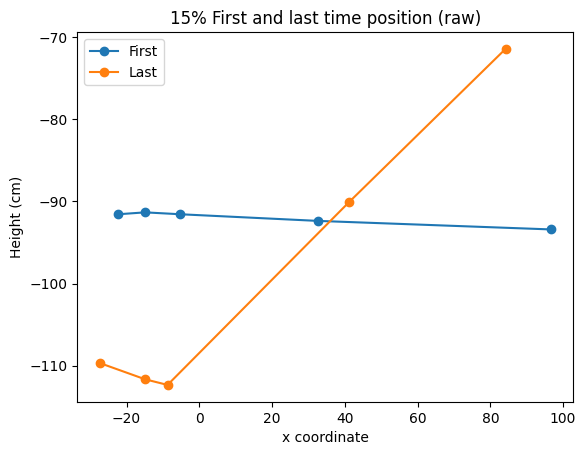

In [153]:
ax = plt.gca()

ax.plot(x.iloc[0, good_points], y.iloc[0, good_points], label='First', marker='o')
ax.plot(x.iloc[-1, good_points], y.iloc[-1, good_points], label='Last', marker='o')

ax.legend()
ax.set_title(f'{run}% First and last time position (raw)')
ax.set_xlabel('x coordinate')
ax.set_ylabel('Height (cm)')

plt.show()

In [154]:
# fig, h_ax = plt.subplots()

# line, = h_ax.plot(x.iloc[0, good_points], y.iloc[0, good_points], marker='o')
# h_ax.set_xlim((1.1*x.min(axis=None), 1.1*x.max(axis=None)))
# h_ax.set_ylim((1.1*y.min(axis=None), 0.9*y.max(axis=None)))

# h_ax.set_ylabel('Height')
# h_ax.set_xlabel('x coordinate')
# h_ax.set_title('t = 0s')

# def update(frame):
#     global line, h_ax
#     line.set_xdata(x.iloc[frame, good_points])
#     line.set_ydata(y.iloc[frame, good_points])
#     h_ax.set_title(f't = {y.index[frame]:3.3f}s')

# anim = FuncAnimation(fig, update, len(y), blit=False, repeat=True)
# plt.show()

In [155]:
angle_data = pd.read_csv(f'../../data/{run}__origin_with_theta.csv', usecols=['t', 'x', 'y', 'theta'], index_col='t')
angle_data

,x,y,theta
t,,,
0.000000,-71.58050,-100.0973,-1.846212
0.033367,-71.58183,-100.0947,-1.847436
0.066733,-71.58396,-100.0968,-1.846360
0.100100,-71.58321,-100.0960,-1.846795
0.133467,-71.58309,-100.0957,-1.846945
...,...,...,...
6.139467,-62.15858,-144.6049,21.027600
6.172833,-62.12615,-144.5859,21.024250
6.206200,-62.22208,-144.6035,21.015800


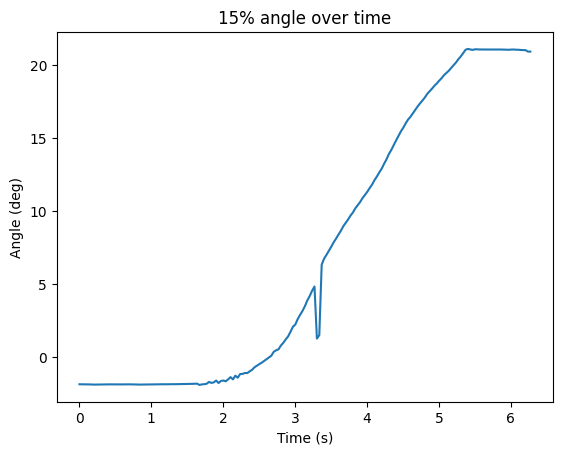

In [156]:
fig, ax = plt.subplots()

ax.plot(angle_data['theta'])
ax.set_title(f'{run}% angle over time')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle (deg)')

plt.show()

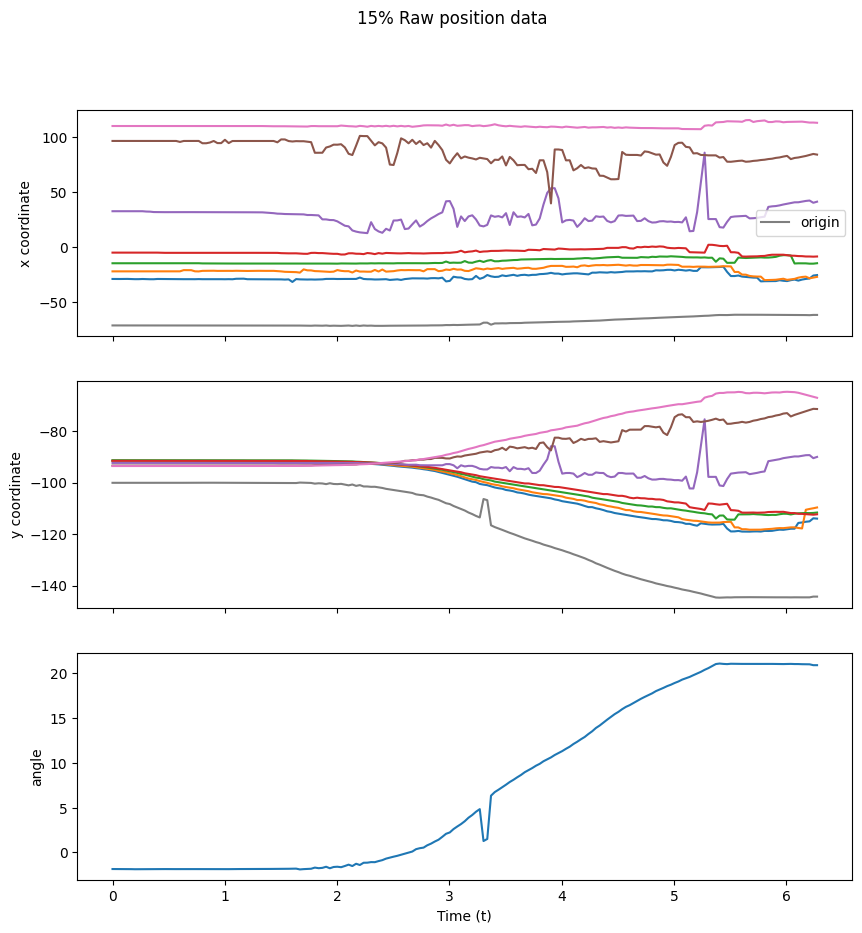

In [157]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=3, sharex=True)

axes[0].plot(x)
axes[0].plot(angle_data['x'], label='origin')
axes[0].set_ylabel('x coordinate')
axes[0].legend()

axes[1].plot(y)
axes[1].plot(angle_data['y'], label='origin')
axes[1].set_ylabel('y coordinate')

axes[2].plot(angle_data['theta'])
axes[2].set_ylabel('angle')

axes[-1].set_xlabel('Time (t)')

fig.suptitle(f'{run}% Raw position data')

plt.show()

In [ ]:
# The next four cells are just for time correcting the origin location, which is only a potential problem in the 3% run
# angle_data_corrected is identical to angle_data otherwise
# uncomment the addition in the fourth cell to time-correct

origin_peak_movement = angle_data.index[np.argmax(np.abs(np.diff(angle_data['y'])))]
origin_peak_movement

np.float64(3.336667)

In [159]:
pts_peak_movement = y.index[np.argmax(np.abs(np.diff(y['Y1'])))]
pts_peak_movement

np.float64(6.072733)

In [160]:
time_difference = pts_peak_movement - origin_peak_movement
time_difference

np.float64(2.7360660000000006)

In [ ]:
angle_data_corrected = angle_data.copy()

# uncomment me to time-correct for the 3% run
angle_data_corrected.index = angle_data.index #+ time_difference
angle_data_corrected

,x,y,theta
t,,,
0.000000,-71.58050,-100.0973,-1.846212
0.033367,-71.58183,-100.0947,-1.847436
0.066733,-71.58396,-100.0968,-1.846360
0.100100,-71.58321,-100.0960,-1.846795
0.133467,-71.58309,-100.0957,-1.846945
...,...,...,...
6.139467,-62.15858,-144.6049,21.027600
6.172833,-62.12615,-144.5859,21.024250
6.206200,-62.22208,-144.6035,21.015800


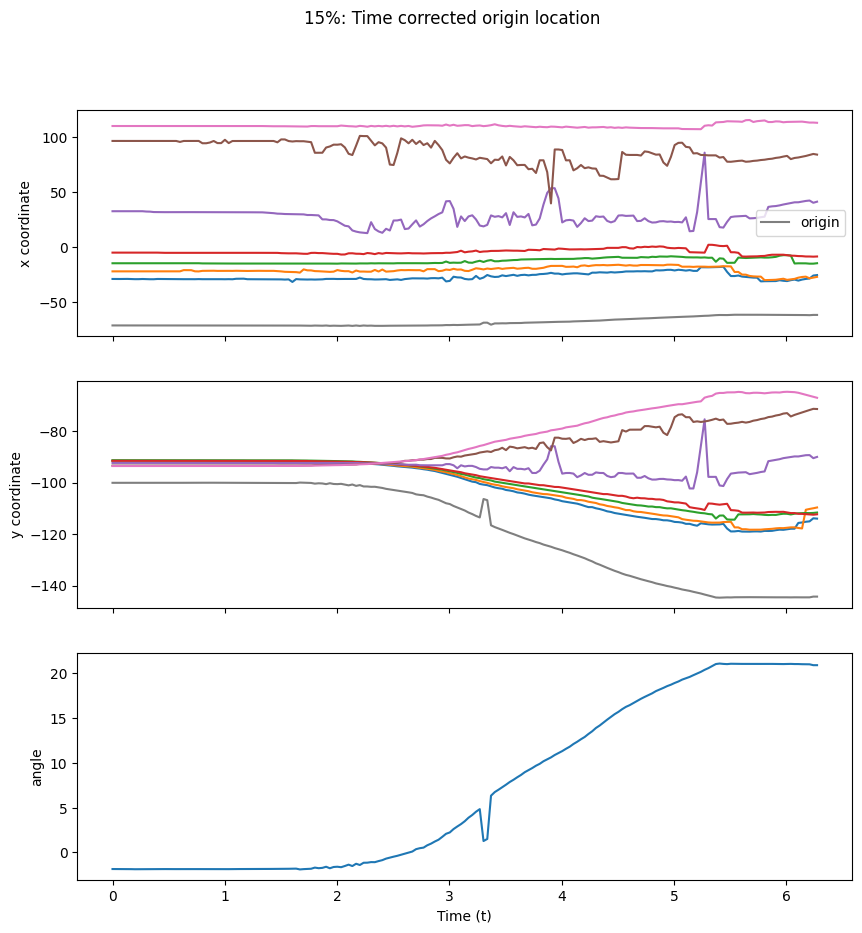

In [162]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=3, sharex=True)

axes[0].plot(x)
axes[0].plot(angle_data_corrected['x'], label='origin')
axes[0].set_ylabel('x coordinate')
axes[0].legend()

axes[1].plot(y)
axes[1].plot(angle_data_corrected['y'], label='origin')
axes[1].set_ylabel('y coordinate')

axes[2].plot(angle_data_corrected['theta'])
axes[2].set_ylabel('angle')

axes[-1].set_xlabel('Time (t)')

fig.suptitle(f'{run}%: Time corrected origin location')

plt.show()

In [163]:
def get_nearest_angle_t(row):
    return np.argmin(np.abs(row['t'] - angle_data_corrected.index))

In [164]:
time_match = height_data.reset_index()[['t']]
time_match['angle_t_i'] = time_match.apply(get_nearest_angle_t, axis=1)
time_match['angle_t'] = angle_data_corrected.index[time_match['angle_t_i']]
# time_match['angle'] = angle_data['theta'].values[time_match['angle_t_i']]
# time_match.set_index('t', inplace=True)
# time_match

time_match = pd.merge(time_match, angle_data_corrected, how='left', left_on='angle_t', right_on='t')
time_match.set_index('t', inplace=True)
time_match

,angle_t_i,angle_t,x,y,theta
t,,,,,
0.000000,0,0.000000,-71.58050,-100.0973,-1.846212
0.033367,1,0.033367,-71.58183,-100.0947,-1.847436
0.066733,2,0.066733,-71.58396,-100.0968,-1.846360
0.100100,3,0.100100,-71.58321,-100.0960,-1.846795
0.133467,4,0.133467,-71.58309,-100.0957,-1.846945
...,...,...,...,...,...
6.139467,184,6.139467,-62.15858,-144.6049,21.027600
6.172833,185,6.172833,-62.12615,-144.5859,21.024250
6.206200,186,6.206200,-62.22208,-144.6035,21.015800


In [165]:
# This seems cursed
origin_removed_x = (x.T - time_match['x']).T
origin_removed_y = (y.T - time_match['y']).T

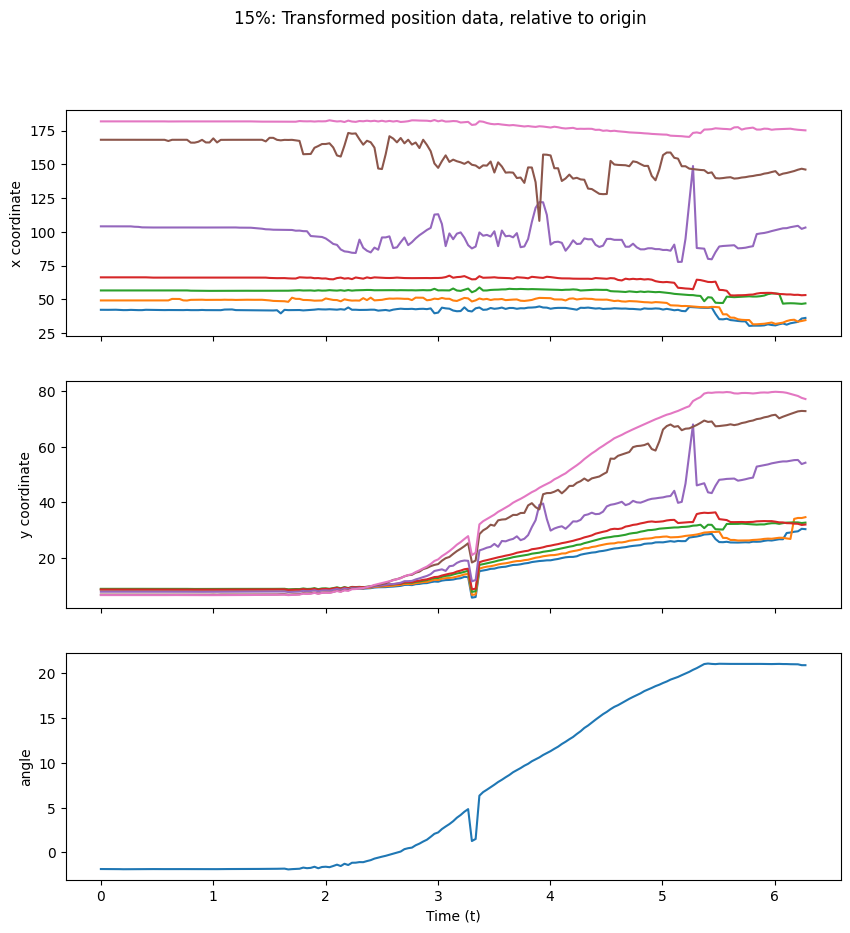

In [166]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=3, sharex=True)

axes[0].plot(origin_removed_x)
# axes[0].plot(angle_data['x'], label='origin')
axes[0].set_ylabel('x coordinate')
# axes[0].legend()

axes[1].plot(origin_removed_y)
# axes[1].plot(angle_data['y'], label='origin')
axes[1].set_ylabel('y coordinate')

axes[2].plot(angle_data['theta'])
axes[2].set_ylabel('angle')


axes[-1].set_xlabel('Time (t)')

fig.suptitle(f'{run}%: Transformed position data, relative to origin')

plt.show()

In [167]:
origin_removed_y.index[origin_removed_y['Y1'].argmax()]

np.float64(6.239567)

In [168]:
n_points = height_data.shape[1] // 2

tx = pd.DataFrame(index=height_data.index)
ty = tx.copy()

for i in range(n_points):
    x_coord = origin_removed_x[f'X{i+1}']
    y_coord = origin_removed_y[f'Y{i+1}']

    # dist = np.sqrt((x_coord - time_match['x'])**2 + (y_coord - time_match['y'])**2)

    # Negative because we want to UNDO the rotation
    angle = - time_match['theta']

    # This is just a rotation matrix
    tx[f'X{i+1}'] = np.cos(angle) * x_coord - np.sin(angle) * y_coord
    ty[f'Y{i+1}'] = np.sin(angle) * x_coord + np.cos(angle) * y_coord

In [169]:
tx

,X1,X2,X3,X4,X5,X6,X7
t,,,,,,,
0.000000,-19.744219,-21.628034,-23.859637,-26.274781,-35.763867,-52.189258,-55.720666
0.033367,-19.781125,-21.681103,-23.921219,-26.347973,-35.881788,-52.382987,-55.930482
0.066733,-19.741308,-21.635171,-23.874609,-26.284352,-35.778847,-52.213406,-55.746759
0.100100,-19.771730,-21.653821,-23.887883,-26.308835,-35.820546,-52.282048,-55.821119
0.133467,-19.783895,-21.660266,-23.901961,-26.316880,-35.834938,-52.305730,-55.846773
...,...,...,...,...,...,...,...
6.139467,5.407680,2.157099,-0.087817,-4.022060,-13.904764,-23.369785,-35.692210
6.172833,5.453421,8.112470,0.180989,-3.737921,-13.634598,-22.823785,-35.088780
6.206200,5.687622,9.587546,0.765607,-3.307738,-12.863344,-21.646926,-33.618766


In [170]:
ty

,Y1,Y2,Y3,Y4,Y5,Y6,Y7
t,,,,,,,
0.000000,38.450783,45.116855,52.164549,61.559847,98.109741,160.053529,173.199536
0.033367,38.403677,45.092338,52.139063,61.529630,98.067882,159.991519,173.133194
0.066733,38.422806,45.117119,52.183575,61.559423,98.107913,160.049268,173.194753
0.100100,38.471465,45.107200,52.151398,61.542566,98.091836,160.026037,173.169984
0.133467,38.484939,45.103918,52.163763,61.535936,98.086428,160.018159,173.161575
...,...,...,...,...,...,...,...
6.139467,-43.201523,-43.821645,-57.443352,-62.649513,-116.381696,-159.575848,-190.015060
6.172833,-43.801900,-48.141143,-57.405174,-62.306541,-117.002159,-160.491301,-189.522661
6.206200,-44.247172,-47.090854,-57.241272,-62.369132,-117.533016,-161.743092,-189.327922


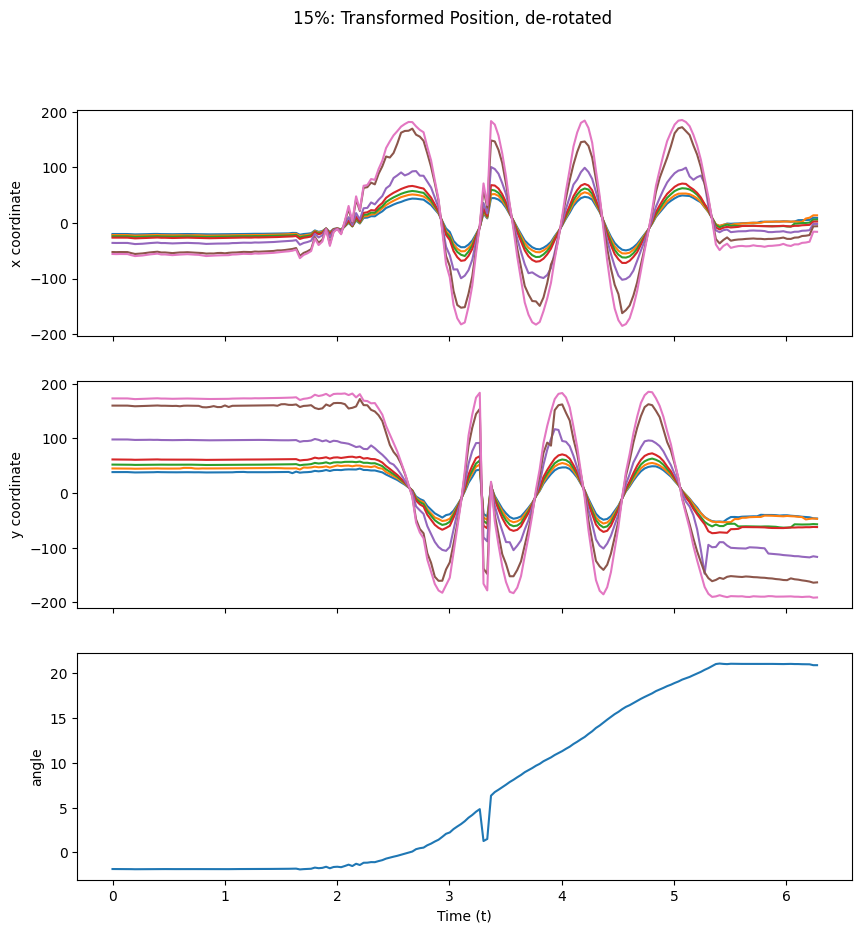

In [171]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=3, sharex=True)

axes[0].plot(tx)
# axes[0].plot(angle_data['x'], label='origin')
axes[0].set_ylabel('x coordinate')
# axes[0].legend()

axes[1].plot(ty)
# axes[1].plot(angle_data['y'], label='origin')
axes[1].set_ylabel('y coordinate')

axes[2].plot(angle_data['theta'])
axes[2].set_ylabel('angle')


axes[-1].set_xlabel('Time (t)')

fig.suptitle(f'{run}%: Transformed Position, de-rotated')

plt.show()